In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
gender=["M","F","M","F","M","F","M","F","M","F","M"]
clas = ["a","b",np.nan,"a","b","c","a",np.nan,"c",np.nan,"b"]
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14,np.nan,6])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3,7,9])
V3 = np.array([np.NaN,130,59,160,120,75,np.NaN,100,150,125,np.nan])
dept = ["HR","IT","IT","HR","IT",np.nan,"HR","IT",np.nan,"HR","IT"]
df = pd.DataFrame({
         "gender": gender,
          "class": clas,
          "var1" : V1,
          "var2" : V2,
         "salary": V3,
         "dept"  : dept   })
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [ ]:
df.isnull()

,gender,class,var1,var2,salary,dept
0,False,False,False,False,True,False
1,False,False,False,True,False,False
2,False,True,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,True
6,False,False,True,True,True,False
7,False,True,False,False,False,False
8,False,False,False,False,False,True
9,False,True,True,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  11 non-null     object 
 1   class   8 non-null      object 
 2   var1    8 non-null      float64
 3   var2    8 non-null      float64
 4   salary  8 non-null      float64
 5   dept    9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 656.0+ bytes


In [ ]:
df.isnull().sum()

gender    0
class     3
var1      3
var2      3
salary    3
dept      2
dtype: int64

In [ ]:
np.nan

nan

In [ ]:
type(np.nan) # neden float ??

float

In [ ]:
np.empty(3)

array([0.e+000, 5.e-324, 1.e-323])

In [ ]:
df.dropna() # dropna = içinde bir tane bile NaN olan entryi hepsini siler!

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [ ]:
df.isnull().sum() / len(df) # kaç farklı boşluk var onun yüzdesini gördük.

gender    0.000000
class     0.272727
var1      0.272727
var2      0.272727
salary    0.272727
dept      0.181818
dtype: float64

In [ ]:
df.salary.isnull().sum()

3

In [ ]:
df.isnull().any() # herhangi bir null var mı kontrol ettik.

gender    False
class      True
var1       True
var2       True
salary     True
dept       True
dtype: bool

In [ ]:
df.isnull().all() # hepsi null muı diye.

gender    False
class     False
var1      False
var2      False
salary    False
dept      False
dtype: bool

In [ ]:
df.isnull().any(axis=1) # herhangi bir null var mı

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [ ]:
df[df.isnull( )]

,gender,class,var1,var2,salary,dept
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.isnull( ).any( axis=1 )] # 4. satır gitti / sadece true ları döndürdü. çünkü 4. satırda 1 tane bile NaN yok.

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR
10,M,b,6.0,9.0,NaN,IT


In [ ]:
df[ ~(df.isnull( ).any( axis=1 ))]

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [ ]:
df.fillna("other") # NaN' ları doldurduk.

,gender,class,var1,var2,salary,dept
0,M,a,2,8,other,HR
1,F,b,3,other,130,IT
2,M,other,5,5,59,IT
3,F,a,other,8,160,HR
4,M,b,7,11,120,IT
5,F,c,1,other,75,other
6,M,a,other,other,other,HR
7,F,other,10,2,100,IT
8,M,c,14,3,150,other
9,F,other,other,7,125,HR


In [ ]:
df["class"].fillna("other")

0         a
1         b
2     other
3         a
4         b
5         c
6         a
7     other
8         c
9     other
10        b
Name: class, dtype: object

In [ ]:
df["salary"].fillna(2000)

0     2000.0
1      130.0
2       59.0
3      160.0
4      120.0
5       75.0
6     2000.0
7      100.0
8      150.0
9      125.0
10    2000.0
Name: salary, dtype: float64

In [ ]:
df["salary"].fillna(df["salary"].mean())

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [ ]:
sal = df["salary"].mean()
df["salary"].fillna( sal ) # bu da bir çözümdür. yukarıdakinin aynısı.

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [ ]:
df[ df.salary.isnull() ]["salary"] == -1
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [ ]:
df[ df.salary.isnull( )]

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
6,M,a,NaN,NaN,NaN,HR
10,M,b,6.0,9.0,NaN,IT


In [ ]:
df.loc[ : , "salary"]

0       NaN
1     130.0
2      59.0
3     160.0
4     120.0
5      75.0
6       NaN
7     100.0
8     150.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [ ]:
df.loc[ [0,6,10] , "salary"]

0    NaN
6    NaN
10   NaN
Name: salary, dtype: float64

In [ ]:
df.loc[ df.salary.isnull(), "salary"] = df.salary.mean()
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,NaN,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,NaN,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,NaN,75.000,NaN
6,M,a,NaN,NaN,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,NaN,7.0,125.000,HR


In [ ]:
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,NaN,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,NaN,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,NaN,75.000,NaN
6,M,a,NaN,NaN,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,NaN,7.0,125.000,HR


In [ ]:
df.fillna({"class": "other",
           "var1": df.var1.mean(), # bunu meanle doldurduk
           "var2": df.var2.median(),
           "dept": df.dept.mode()[0] }) # ilk modu alsın diye [0] yazdık.

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,other,5.0,5.0,59.000,IT
3,F,a,6.0,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,IT
6,M,a,6.0,7.5,114.875,HR
7,F,other,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,IT
9,F,other,6.0,7.0,125.000,HR


In [ ]:
df.mode()

,gender,class,var1,var2,salary,dept
0,M,a,1.0,8.0,114.875,IT
1,NaN,b,2.0,NaN,NaN,NaN
2,NaN,NaN,3.0,NaN,NaN,NaN
3,NaN,NaN,5.0,NaN,NaN,NaN
4,NaN,NaN,6.0,NaN,NaN,NaN
5,NaN,NaN,7.0,NaN,NaN,NaN
6,NaN,NaN,10.0,NaN,NaN,NaN
7,NaN,NaN,14.0,NaN,NaN,NaN


In [ ]:
df["class"].mode

<bound method Series.mode of 0       a
1       b
2     NaN
3       a
4       b
5       c
6       a
7     NaN
8       c
9     NaN
10      b
Name: class, dtype: object>

In [ ]:
df.notna()

,gender,class,var1,var2,salary,dept
0,True,True,True,True,True,True
1,True,True,True,False,True,True
2,True,False,True,True,True,True
3,True,True,False,True,True,True
4,True,True,True,True,True,True
5,True,True,True,False,True,False
6,True,True,False,False,True,True
7,True,False,True,True,True,True
8,True,True,True,True,True,False
9,True,False,False,True,True,True


In [ ]:
df.where( df.notna(), df.mean(), axis=1) 

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.000,114.875,HR
1,F,b,3.0,6.625,130.000,IT
2,M,NaN,5.0,5.000,59.000,IT
3,F,a,6.0,8.000,160.000,HR
4,M,b,7.0,11.000,120.000,IT
5,F,c,1.0,6.625,75.000,NaN
6,M,a,6.0,6.625,114.875,HR
7,F,NaN,10.0,2.000,100.000,IT
8,M,c,14.0,3.000,150.000,NaN
9,F,NaN,6.0,7.000,125.000,HR


In [ ]:
import warnings
warnings.filterwarnings("ignore")
df.where( df.notna(), df.median(), axis =1 )

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,5.5,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,NaN
6,M,a,5.5,7.5,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,5.5,7.0,125.000,HR


In [ ]:
df.dept.fillna(df.dept.mode()[0], inplace=True)

In [ ]:
df.loc[ [0,6,7,10], "salary"] = np.nan
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,IT
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,NaN,IT
8,M,c,14.0,3.0,150.0,IT
9,F,NaN,NaN,7.0,125.0,HR


In [ ]:
df.groupby(["gender", "dept"])["salary"].mean() # kadın ve erkek departmanlara göre ortalama ne kadar maaş alıyor onu gösterdi.

gender  dept
F       HR      142.500000
        IT      102.500000
M       HR             NaN
        IT      109.666667
Name: salary, dtype: float64

In [ ]:
df.groupby(["dept"])["salary"].mean()

dept
HR    142.5
IT    106.8
Name: salary, dtype: float64

In [ ]:
df.salary.fillna(df.groupby(["dept"])["salary"].transform("mean"), inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,142.5,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,IT
6,M,a,NaN,NaN,142.5,HR
7,F,NaN,10.0,2.0,106.8,IT
8,M,c,14.0,3.0,150.0,IT
9,F,NaN,NaN,7.0,125.0,HR


In [ ]:
df["class"].fillna( df["class"].mode()[0] )

0     a
1     b
2     a
3     a
4     b
5     c
6     a
7     a
8     c
9     a
10    b
Name: class, dtype: object

In [ ]:
df.groupby(["gender"])["var1"].apply(lambda x: x.mean())

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [ ]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flights.loc[np.random.randint(0, 144, 10) , "passengers"] = np.nan
flights

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,121.0
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,461.0
142,1960,Nov,390.0


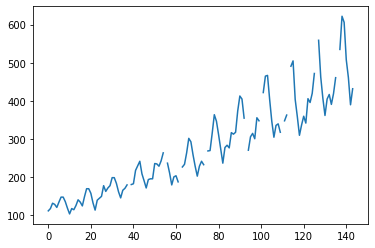

In [ ]:
flights.passengers.plot()

In [ ]:
flights.isnull().sum()

year           0
month          0
passengers    10
dtype: int64

In [ ]:
flights.passengers.fillna(method="bfill") # bir alttaki veri ile doldurur. ve bu yüzden 143 NaN'dır.

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
Name: passengers, Length: 144, dtype: float64

In [ ]:
flights.passengers.fillna(method="ffill") 

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
Name: passengers, Length: 144, dtype: float64

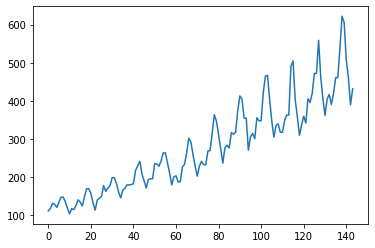

In [ ]:
flights.passengers.fillna(method="ffill").plot()

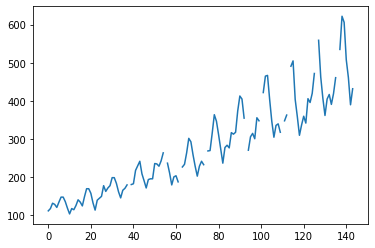

In [ ]:
flights.passengers.plot()

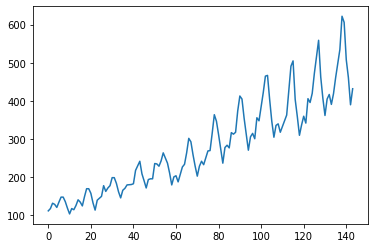

In [ ]:
flights.passengers.interpolate().plot() # interpolate linspace yapar.

In [ ]:
np.linspace(129, 135, 3)  # 129 ve 135 arasını ayrı ayrı sayı olarak 3'e böl

array([129., 132., 135.])

In [ ]:
np.linspace(112, 132, 5)

array([112., 117., 122., 127., 132.])

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna() # tüm NaN ları sildik burada.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


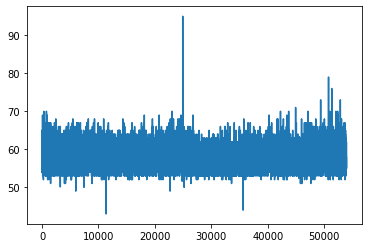

In [ ]:
df.table.plot()

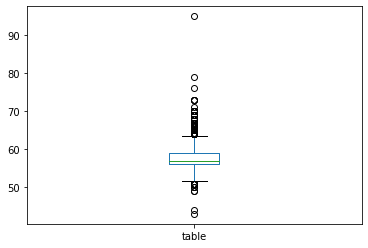

In [ ]:
df.table.plot(kind= "box") # outlierı en iyi gösteren tablo

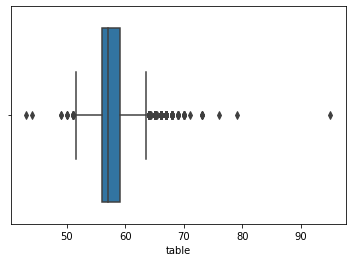

In [ ]:
sns.boxplot(x = df.table) # aynısını seabornda yaptık. seaborn daha kalitelidir gösterimde.

In [ ]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [ ]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [ ]:
df_table.quantile(0.25)

56.0

In [ ]:
df_table.quantile(1)

95.0

In [ ]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
IQR

3.0

In [ ]:
lower_lim = Q1 - 1.5*IQR
lower_lim

51.5

In [ ]:
upper_lim = Q3 + 1.5*IQR
upper_lim

63.5

In [ ]:
df_table > upper_lim

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [ ]:
df_table < lower_lim

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [ ]:
(df_table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [ ]:
(df_table > lower_lim).value_counts()

True     53924
False       16
Name: table, dtype: int64

In [ ]:
not_outlier = (df_table >= lower_lim) | (df_table <= upper_lim)
not_outlier

0        True
1        True
2        True
3        True
4        True
         ... 
53935    True
53936    True
53937    True
53938    True
53939    True
Name: table, Length: 53940, dtype: bool

In [ ]:
df_none_outlier = df[not_outlier]
df_none_outlier

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df[ ~((df.table >= lower_lim) & (df.table<upper_lim)) ] # 606 tane outlier varmış.

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [ ]:
df_table.loc[ df_table > upper_lim ] = upper_lim  # küçükleri lower'a büyükleri upper'a eşledik.
df_table.loc[ df_table < lower_lim ] = lower_lim

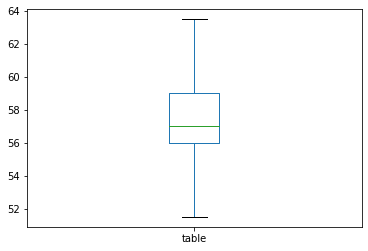

In [ ]:
df_table.plot(kind = "box")

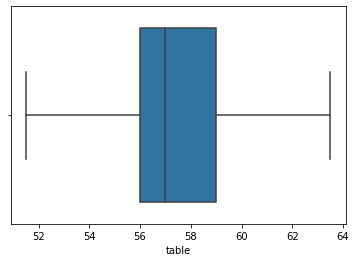

In [ ]:
sns.boxplot(x = df_table )

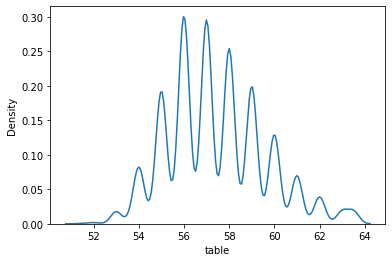

In [ ]:
sns.kdeplot( x = df_table)

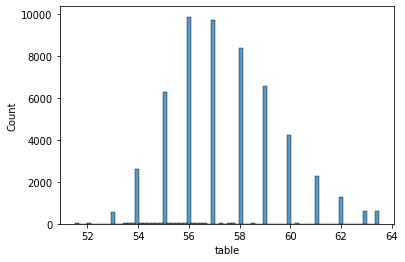

In [ ]:
sns.histplot(x = df_table)

In [ ]:
from scipy.stats.mstats import winsorize
df_win = winsorize(df.table, (0.0001,0.00019))
df_win.sort()
df_win

masked_array(data=[51.5, 51.5, 51.5, ..., 63.5, 63.5, 63.5],
             mask=False,
       fill_value=1e+20)

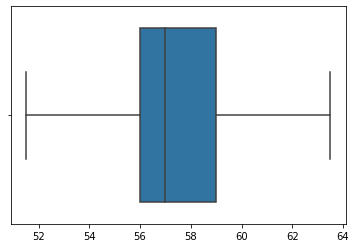

In [ ]:
sns.boxplot(x = df_win)

In [ ]:
len(df[df.table<lower_lim]) / len(df)

0.0

In [ ]:
len(df[df.table<upper_lim]) / len(df)

0.9890619206525769

**LOG**

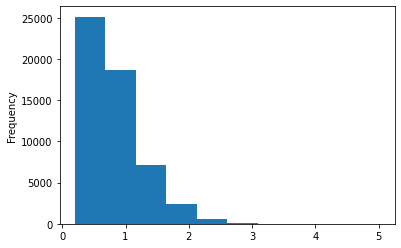

In [ ]:
df.carat.plot(kind="hist")

In [ ]:
df["log carat"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,log carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,63.5,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


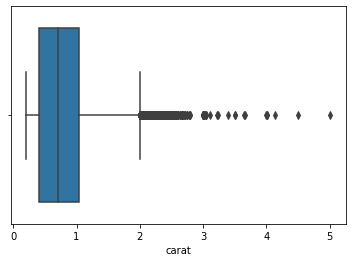

In [ ]:
sns.boxplot( x = df.carat )

In [ ]:
sns.boxplot( x = df.log_carat )

AttributeError: ignored

In [ ]:
sns.histplot( x= df.log)

In [ ]:
df["log_carat"] = np.log(df.carat)
df_carat_log = df.log_carat
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log
IQR_log

0.9555114450274363

In [ ]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

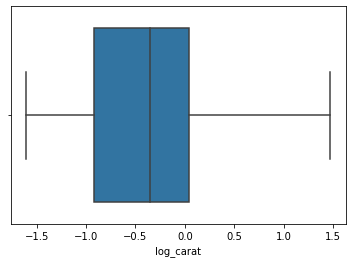

In [ ]:
df.loc[df.log_carat > upper_lim_log,  "log_carat"] = upper_lim_log
sns.boxplot( x = df.log_carat)